In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [3]:
trees = [Tree(fc.higgs_cr.JetHT_Data_UL_List,lazy=1),Tree(fc.higgs_cr.QCD_B_List,verify=False,lazy=1)]

ValueError: PartitionedArray must have at least one partition

(https://github.com/scikit-hep/awkward-1.0/blob/1.4.0/src/libawkward/partition/PartitionedArray.cpp#L19)

In [13]:
for tree in trees: print_raw_info(tree)

unk & 1 & 160697632 & 6159\\
unk & 1 & 71804584 & 2996\\
unk & 1 & 68099424 & 2898\\
unk & 1 & 340445152 & 12064\\
QCD\_bEnriched\_HT100to200 & 1127000.0 & 38498992 & 0\\
QCD\_bEnriched\_HT200to300 & 80430.0 & 19407546 & 0\\
QCD\_bEnriched\_HT300to500 & 16620.0 & 12042685 & 24\\
QCD\_bEnriched\_HT500to700 & 1487.0 & 10381843 & 235\\
QCD\_bEnriched\_HT700to1000 & 296.5 & 2031431 & 139\\
QCD\_bEnriched\_HT1000to1500 & 46.61 & 474198 & 70\\
QCD\_bEnriched\_HT1500to2000 & 3.72 & 411724 & 114\\
QCD\_bEnriched\_HT2000toInf & 0.6462 & 401397 & 199\\
QCD\_HT100to200\_BGenFilter & 1275000.0 & 36346204 & 0\\
QCD\_HT200to300\_BGenFilter & 111700.0 & 18762564 & 1\\
QCD\_HT300to500\_BGenFilter & 27960.0 & 17127050 & 10\\
QCD\_HT500to700\_BGenFilter & 3078.0 & 8292039 & 46\\
QCD\_HT700to1000\_BGenFilter & 721.8 & 5952088 & 94\\
QCD\_HT1000to1500\_BGenFilter & 138.2 & 1953159 & 74\\
QCD\_HT1500to2000\_BGenFilter & 13.61 & 511470 & 44\\
QCD\_HT2000toInf\_BGenFilter & 2.92 & 287303 & 50\\


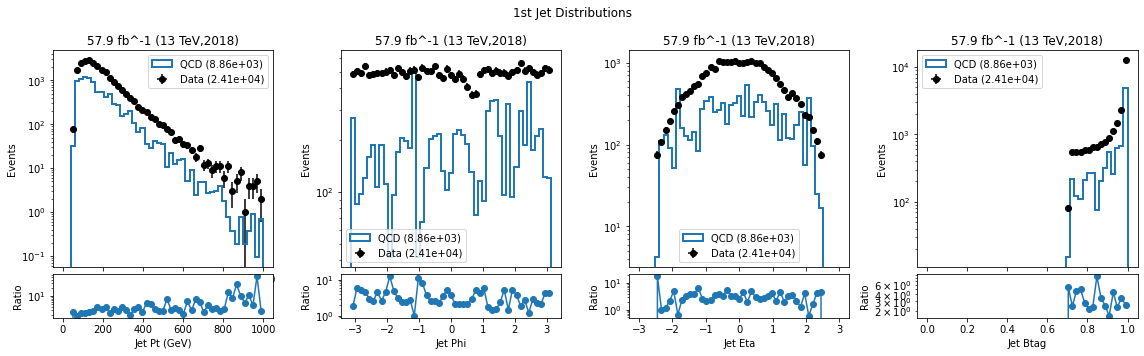

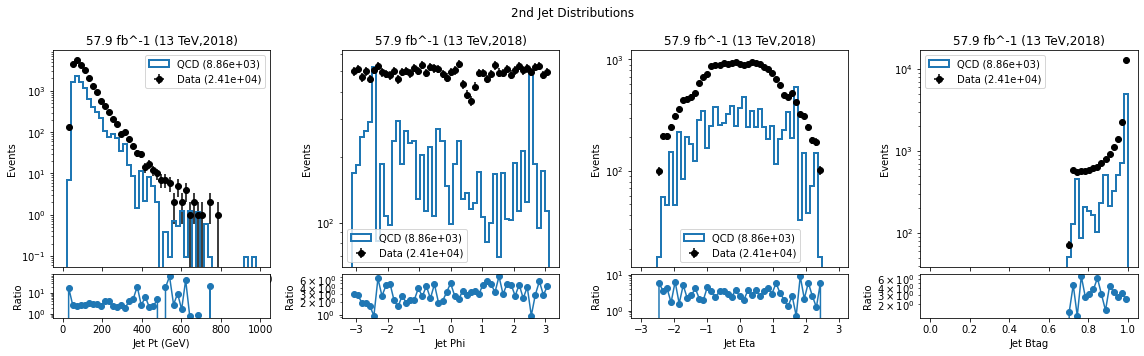

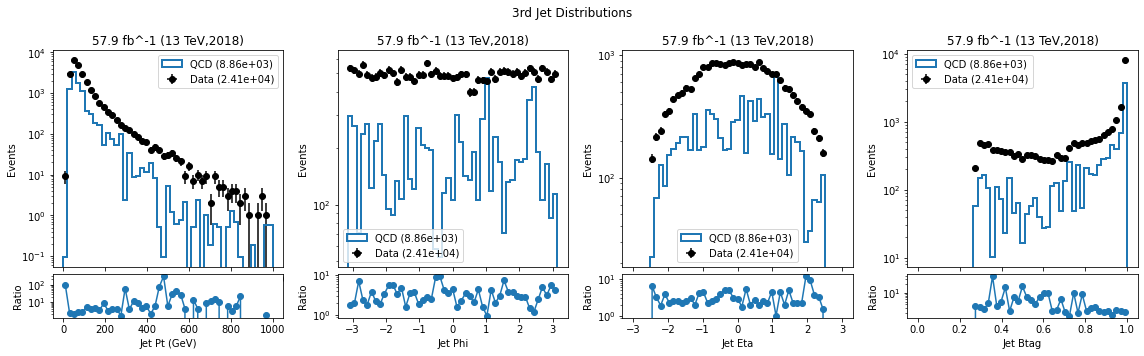

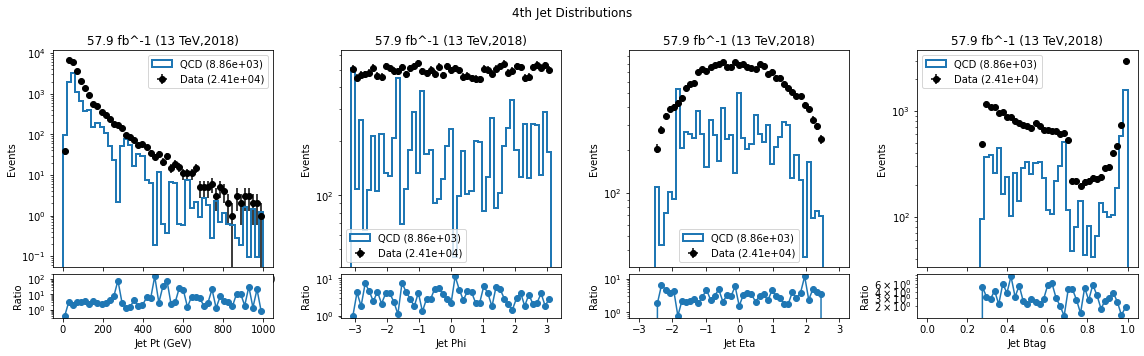

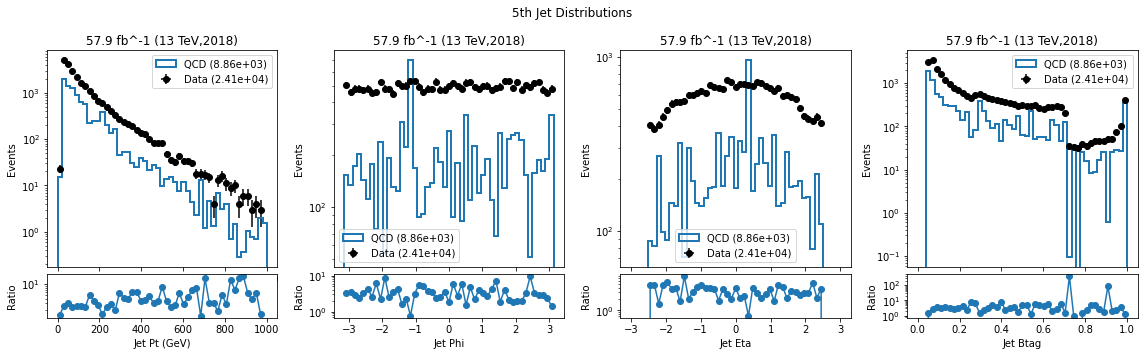

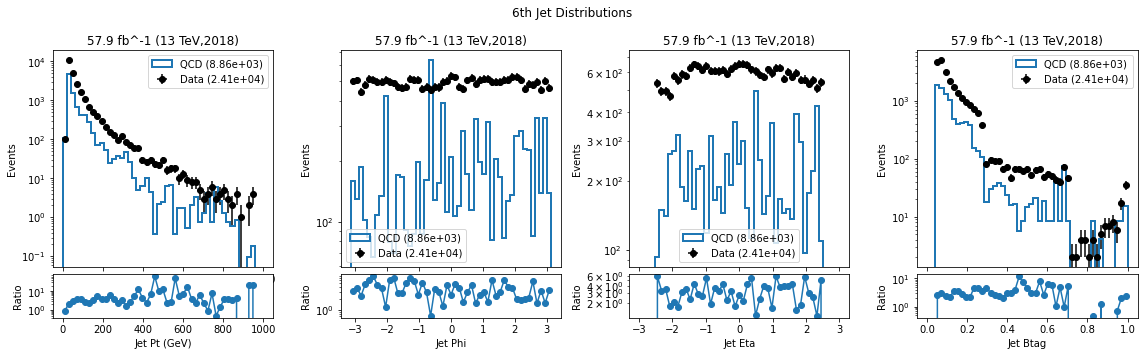

In [6]:
study.ijets(trees,ratio=1,log=1,saveas="qcd_vs_data")

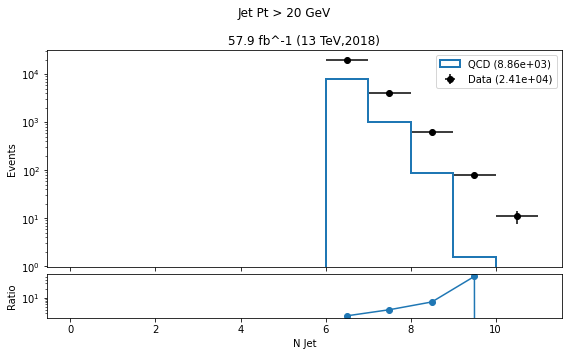

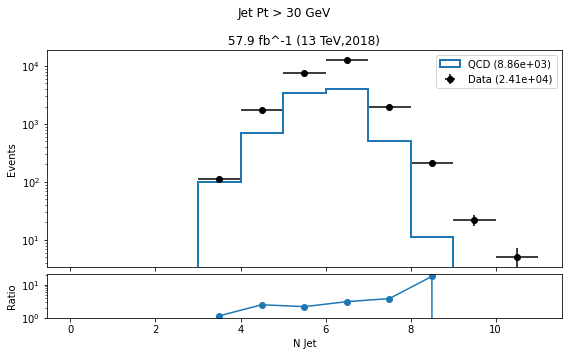

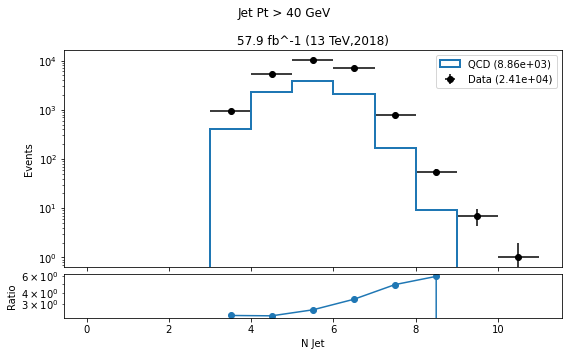

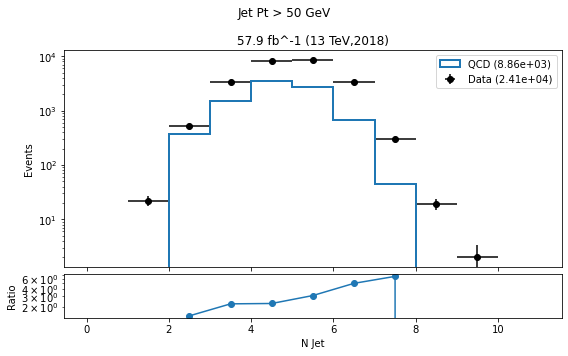

In [7]:
ptbins = [20,30,40,50]
pt_selection = lambda tree,pt : Selection(tree,cuts=dict(ptcut=pt))
jet_ptbin = [ [pt_selection(tree,pt) for tree in trees] for pt in ptbins ]

for i,ptbin in enumerate(jet_ptbin): study.njets(ptbin,ratio=1,log=1,title=f"Jet Pt > {ptbins[i]} GeV",saveas=f"jet_pt{ptbins[i]}_qcd_vs_data")

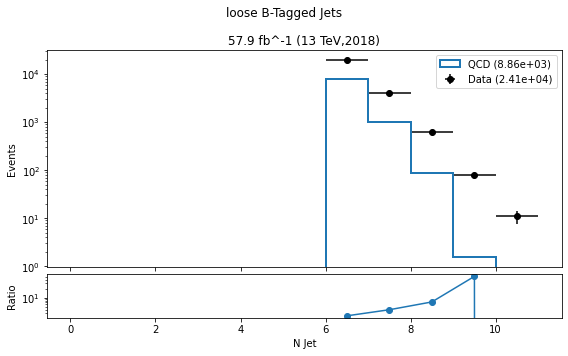

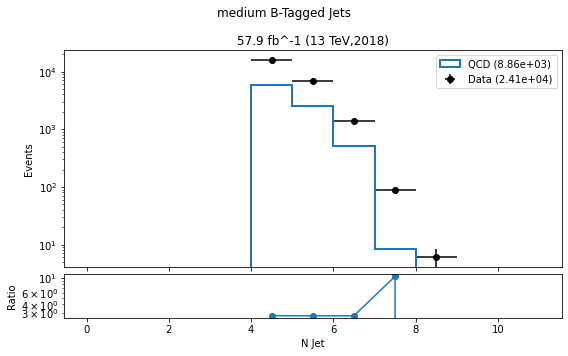

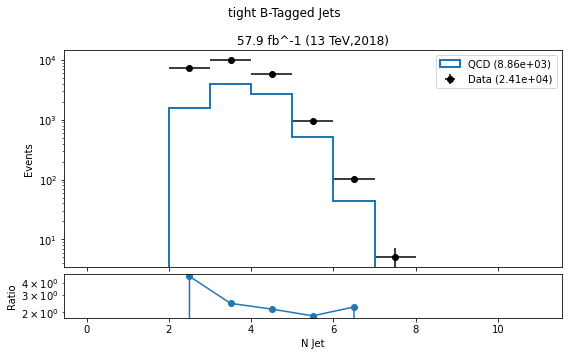

In [8]:
btagwps = [1,2,3]
btagwp_selection = lambda tree,wp : Selection(tree,cuts=dict(btagcut=jet_btagWP[wp]))
jet_btagwp = [ [btagwp_selection(tree,wp) for tree in trees] for wp in btagwps ]

for i,btagwp in enumerate(jet_btagwp): study.njets(btagwp,ratio=1,log=1,title=f"{wplabels[i+1]} B-Tagged Jets",saveas=f"jet_btag{wplabels[i+1]}_qcd_vs_data")

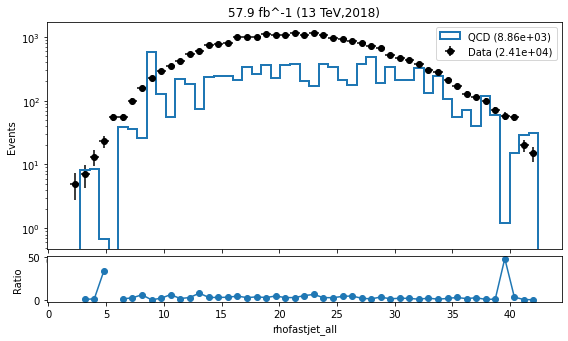

In [10]:
info = dict(log=1,ratio=1,r_ylim=(0.1,1.9),r_grid=True,is_datas=[True,False],ylim=(0.1,1e6),lumikey=2018)
study.quick(trees,varlist=["rhofastjet_all"],**info,saveas="higgs_cr_rhofastjet_all")